### Import Libraries

In [38]:
import pandas as pd
from sklearn.datasets import fetch_openml

In [39]:
# Load heart disease dataset using sklearn.datasets.fetch_openml
heart_disease = fetch_openml(name='heart-disease', as_frame=True).frame
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


### Analyze Data

In [40]:
# Check for missinq values in the dataset
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [42]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Inference: Data looks fine with no missing values

### Regression Model

### Get features and target

In [43]:
# Identify target and features
X = heart_disease.drop(columns=['chol'])
y = heart_disease['chol']

### Split train and test data

In [44]:
from sklearn.model_selection import train_test_split

# Train-test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ElasticNet regression with grid search for hyperparameter tuning

# Define parameter grid
alphas = np.logspace(-3, 1, 10)  # e.g., 0.001 to 10
l1_ratios = np.linspace(0.0, 1.0, 10)

r2_results = np.zeros((len(alphas), len(l1_ratios)))
rmse_results = np.zeros_like(r2_results)

# Grid search
for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2_results[i, j] = r2_score(y_test, y_pred)
        rmse_results[i, j] = np.sqrt(mean_squared_error(y_test, y_pred))


c:\Users\SHEONA HANS\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.824e+05, tolerance: 6.718e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\SHEONA HANS\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.827e+05, tolerance: 6.718e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in

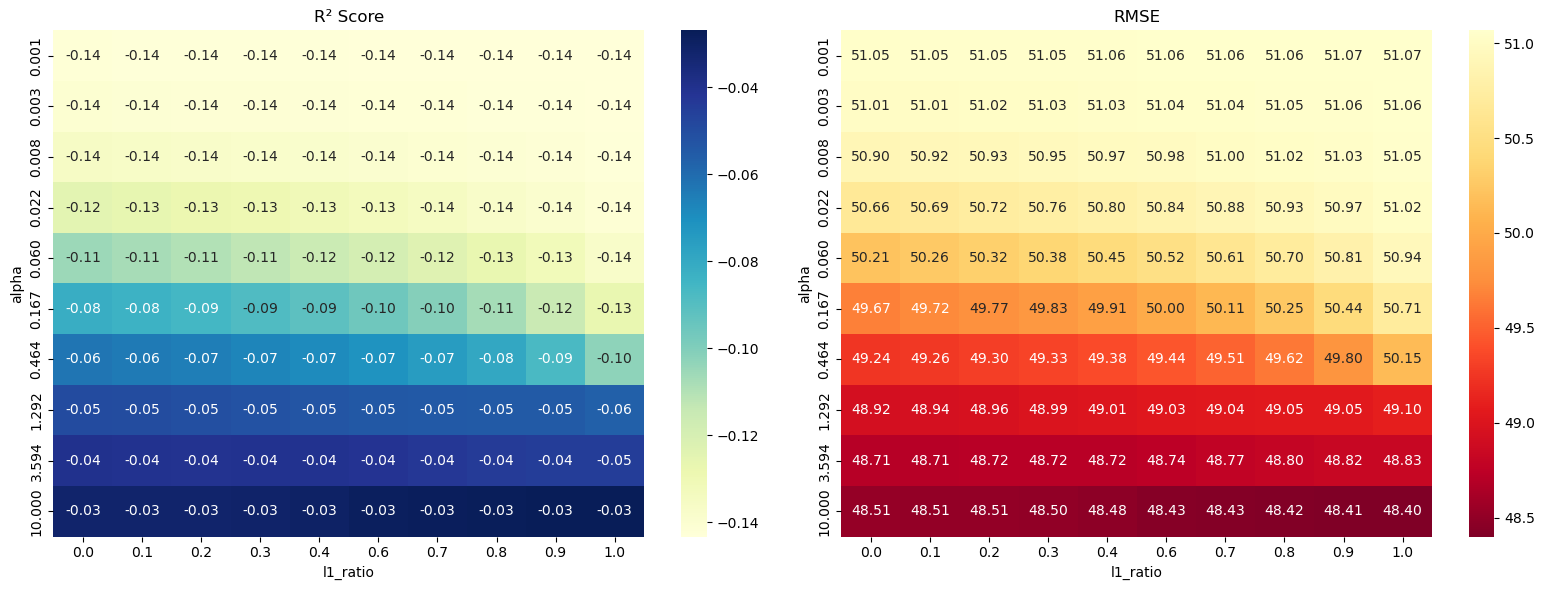

In [46]:
# Set labels
alpha_labels = [f"{a:.3f}" for a in alphas]
l1_labels = [f"{l:.1f}" for l in l1_ratios]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap visualization of R^2 scores
sns.heatmap(r2_results, xticklabels=l1_labels, yticklabels=alpha_labels,
            annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("R² Score")
axes[0].set_xlabel("l1_ratio")
axes[0].set_ylabel("alpha")

# RMSE Heatmap
sns.heatmap(rmse_results, xticklabels=l1_labels, yticklabels=alpha_labels,
            annot=True, fmt=".2f", cmap="YlOrRd_r", ax=axes[1])
axes[1].set_title("RMSE")
axes[1].set_xlabel("l1_ratio")
axes[1].set_ylabel("alpha")

plt.tight_layout()
plt.show()

### Identify best configuration

In [47]:
best_r2_idx = np.unravel_index(np.argmax(r2_results), r2_results.shape)
best_rmse_idx = np.unravel_index(np.argmin(rmse_results), rmse_results.shape)

print(f"Best R²: {r2_results[best_r2_idx]:.3f} at alpha={alphas[best_r2_idx[0]]:.3f}, l1_ratio={l1_ratios[best_r2_idx[1]]:.1f}")
print(f"Best RMSE: {rmse_results[best_rmse_idx]:.3f} at alpha={alphas[best_rmse_idx[0]]:.3f}, l1_ratio={l1_ratios[best_rmse_idx[1]]:.1f}")


Best R²: -0.027 at alpha=10.000, l1_ratio=1.0
Best RMSE: 48.400 at alpha=10.000, l1_ratio=1.0


## Classification Model

### Import Dataset

In [48]:
heart_disease = fetch_openml(name='heart-disease', as_frame=True).frame

### Get features and target

In [49]:
# Binary target: presence of heart disease (1 = disease present)
X = heart_disease.drop(columns=['target'])
y = heart_disease['target']

### Split train and test data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

penalties = ['l1', 'l2']
solvers = ['liblinear', 'saga']
results_logreg = []

for penalty in penalties:
    for solver in solvers:
        try:
            model = LogisticRegression(penalty=penalty, solver=solver, max_iter=1000)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]
            
            results_logreg.append({
                'penalty': penalty,
                'solver': solver,
                'accuracy': accuracy_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'auroc': roc_auc_score(y_test, y_prob),
                'auprc': average_precision_score(y_test, y_prob),
                'model': model
            })
        except Exception as e:
            print(f"Skipped {penalty}-{solver}: {e}")


c:\Users\SHEONA HANS\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\SHEONA HANS\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### KNN Tune n_neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1, 5, 10]
results_knn = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]

    results_knn.append({
        'n_neighbors': n,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auroc': roc_auc_score(y_test, y_prob),
        'auprc': average_precision_score(y_test, y_prob),
        'model': knn
    })


### Plot AUROC and AUPRC for best models

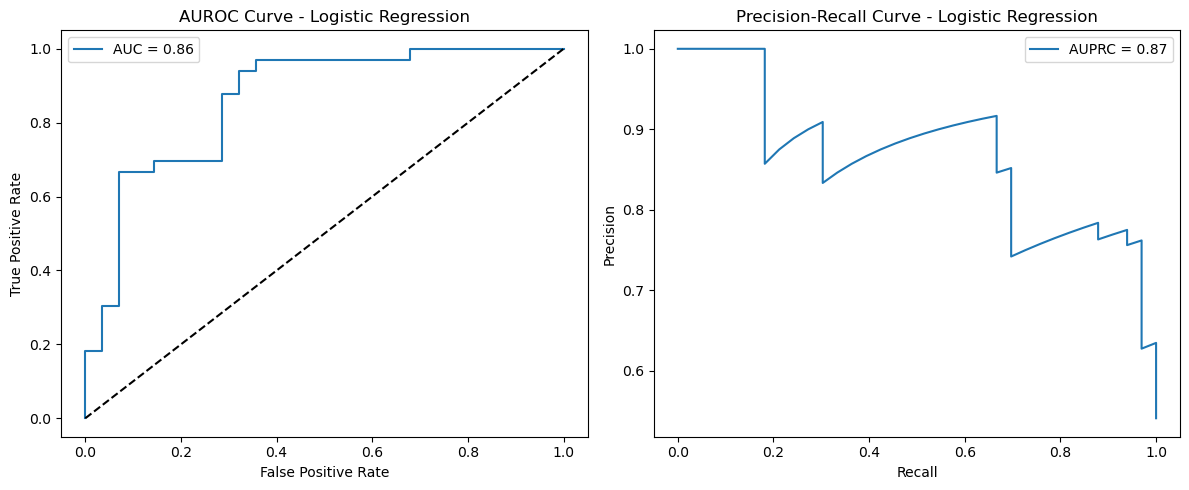

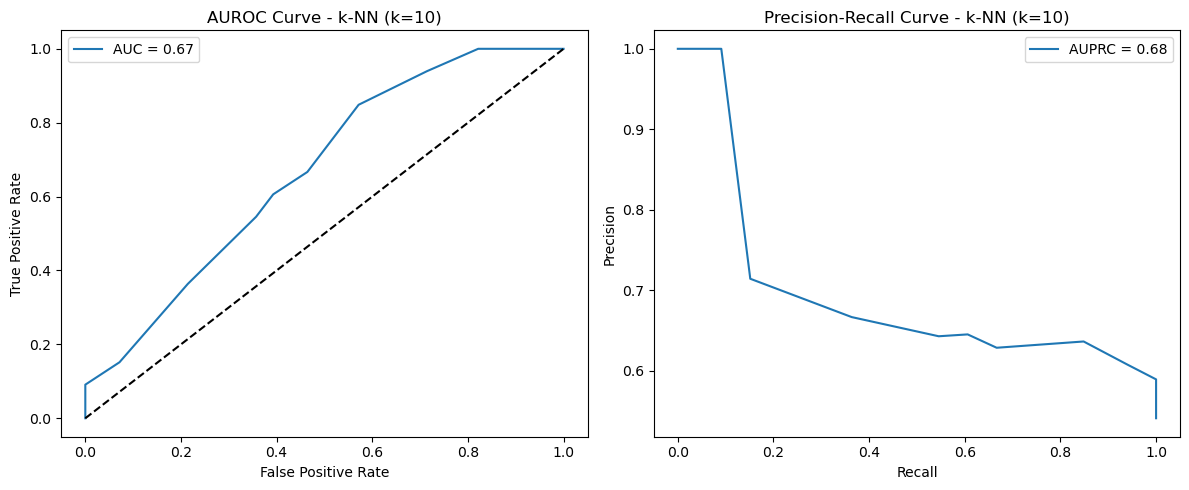

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# Best logistic regression by AUROC
best_logreg = max(results_logreg, key=lambda x: x['auroc'])
best_knn = max(results_knn, key=lambda x: x['auroc'])

def plot_roc_pr(y_test, model, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # AUROC
    axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
    axs[0].plot([0, 1], [0, 1], 'k--')
    axs[0].set_title(f'AUROC Curve - {model_name}')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend()

    # AUPRC
    axs[1].plot(recall, precision, label=f'AUPRC = {average_precision_score(y_test, y_prob):.2f}')
    axs[1].set_title(f'Precision-Recall Curve - {model_name}')
    axs[1].set_xlabel('Recall')
    axs[1].set_ylabel('Precision')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_roc_pr(y_test, best_logreg['model'], 'Logistic Regression')
plot_roc_pr(y_test, best_knn['model'], f'k-NN (k={best_knn["n_neighbors"]})')


# Results summary

In [ ]:
print("Best Logistic Regression:")
print({k: best_logreg[k] for k in best_logreg if k != 'model'})

print("\nBest k-NN:")
print({k: best_knn[k] for k in best_knn if k != 'model'})


Best Logistic Regression:
{'penalty': 'l1', 'solver': 'liblinear', 'accuracy': 0.8032786885245902, 'f1': 0.8333333333333334, 'auroc': 0.8625541125541125, 'auprc': 0.8674351314974464}

Best k-NN:
{'n_neighbors': 10, 'accuracy': 0.6065573770491803, 'f1': 0.625, 'auroc': 0.6677489177489178, 'auprc': 0.6763675469299067}
